In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras import models

%matplotlib inline

In [ ]:
img = load_img('./cat.jpeg', target_size=(299, 299))

x = np.array(img)
X = preprocess_input(np.array([x]))

model = Xception(weights='imagenet', input_shape=(299, 299, 3))
pred = model.predict(X)
decode_predictions(pred)

In [2]:
def make_model():
    model = models.Sequential([
        keras.layers.Conv2D(
            input_shape=(150, 150, 3),
            filters=32, 
            kernel_size=(3, 3),
            activation='relu',
        ),
        keras.layers.MaxPool2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(units = 64, activation='relu'),
        keras.layers.Dense(units = 1, activation = 'sigmoid')
    ])

    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy()

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
model = make_model()

history = model.fit(
    ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
        './train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ),
    steps_per_epoch=100, # 2000 images = batch_size * steps
    epochs=10, 
    validation_data=ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
        './validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ),
    validation_steps=50, # 5000 images = batch_size * steps
    callbacks=[keras.callbacks.ModelCheckpoint(
        'xception_v1_{epoch:02d}_{binary_accuracy:.3f}.h5',
        save_best_only=True,
        monitor='binary_accuracy',
        mode='max'
    )]
)

history.history


In [ ]:
plt.plot(history.history['binary_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Total number of parameters

In [ ]:
model.summary()

## Median of training accuracy & Standard deviation of training loss

In [4]:
model = make_model()

history = model.fit(
    ImageDataGenerator(rescale=1./255).flow_from_directory(
        './train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ), 
    validation_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
        './validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ),
    steps_per_epoch=100,
    epochs=10,
    validation_steps=50
)

history.history

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 13s 124ms/step - loss: 0.6976 - accuracy: 0.5200 - val_loss: 0.6890 - val_accuracy: 0.5290
Epoch 2/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6809 - accuracy: 0.5615 - val_loss: 0.6761 - val_accuracy: 0.5610
Epoch 3/10
100/100 [==============================] - 12s 122ms/step - loss: 0.6719 - accuracy: 0.5740 - val_loss: 0.6568 - val_accuracy: 0.6130
Epoch 4/10
100/100 [==============================] - 12s 125ms/step - loss: 0.6663 - accuracy: 0.5895 - val_loss: 0.6556 - val_accuracy: 0.6070
Epoch 5/10
100/100 [==============================] - 12s 123ms/step - loss: 0.6563 - accuracy: 0.6070 - val_loss: 0.6576 - val_accuracy: 0.6000
Epoch 6/10
100/100 [==============================] - 12s 123ms/step - loss: 0.6573 - accuracy: 0.5905 - val_loss: 0.6583 - val_accuracy: 0.5900
Epoch 7/10
100/100 [=========================

{'loss': [0.6975994110107422,
  0.6808581948280334,
  0.6719326972961426,
  0.666293203830719,
  0.6563460826873779,
  0.6572539806365967,
  0.6461228132247925,
  0.639153003692627,
  0.6417016983032227,
  0.6374177932739258],
 'accuracy': [0.5199999809265137,
  0.5615000128746033,
  0.5740000009536743,
  0.5895000100135803,
  0.6069999933242798,
  0.590499997138977,
  0.6150000095367432,
  0.6169999837875366,
  0.6230000257492065,
  0.6290000081062317],
 'val_loss': [0.6889768838882446,
  0.6761461496353149,
  0.6568049192428589,
  0.6555564999580383,
  0.6575564742088318,
  0.6582554578781128,
  0.6411847472190857,
  0.6300488710403442,
  0.6285549402236938,
  0.6313344836235046],
 'val_accuracy': [0.5289999842643738,
  0.5609999895095825,
  0.6129999756813049,
  0.6069999933242798,
  0.6000000238418579,
  0.5899999737739563,
  0.6230000257492065,
  0.6499999761581421,
  0.6539999842643738,
  0.6399999856948853]}

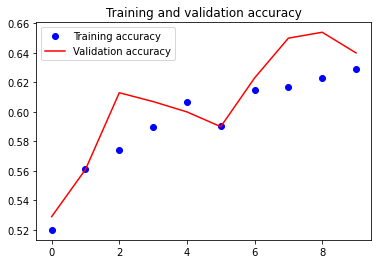

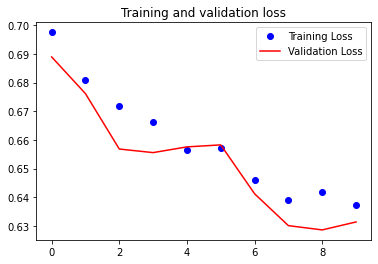

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
np.mean(history.history['accuracy'])

0.5926500022411346

In [8]:
np.std(history.history['loss'])

0.018763772151320326

## Data Augmentation

In [9]:
train_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

history = model.fit(
    train_gen.flow_from_directory(
        './train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
    ), 
    validation_data=val_gen.flow_from_directory(
        './validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=False
    ),
    steps_per_epoch=100,
    epochs=10,
    validation_steps=50
)

history.history

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 24s 237ms/step - loss: 8195.6963 - accuracy: 0.4835 - val_loss: 0.6660 - val_accuracy: 0.9980
Epoch 2/10
100/100 [==============================] - 24s 236ms/step - loss: 0.6938 - accuracy: 0.4935 - val_loss: 0.6744 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 24s 237ms/step - loss: 0.7788 - accuracy: 0.4895 - val_loss: 0.6844 - val_accuracy: 0.9980
Epoch 4/10
100/100 [==============================] - 24s 238ms/step - loss: 0.6928 - accuracy: 0.5175 - val_loss: 0.6794 - val_accuracy: 0.9980
Epoch 5/10
100/100 [==============================] - 24s 238ms/step - loss: 0.6927 - accuracy: 0.5195 - val_loss: 0.6732 - val_accuracy: 0.9990
Epoch 6/10
100/100 [==============================] - 24s 237ms/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6741 - val_accuracy: 1.0000
Epoch 7/10
100/100 [======================

{'loss': [8195.6962890625,
  0.6937832236289978,
  0.7787742018699646,
  0.6928297281265259,
  0.6926842927932739,
  0.693082869052887,
  0.6934581398963928,
  0.6931134462356567,
  0.6935210227966309,
  0.6933289170265198],
 'accuracy': [0.48350000381469727,
  0.4934999942779541,
  0.4894999861717224,
  0.5174999833106995,
  0.5195000171661377,
  0.5080000162124634,
  0.4975000023841858,
  0.5065000057220459,
  0.4860000014305115,
  0.4855000078678131],
 'val_loss': [0.665962278842926,
  0.6743853688240051,
  0.6844483017921448,
  0.6794466376304626,
  0.6731680631637573,
  0.6741359233856201,
  0.6803868412971497,
  0.6807882189750671,
  0.6903114914894104,
  0.6943737864494324],
 'val_accuracy': [0.9980000257492065,
  1.0,
  0.9980000257492065,
  0.9980000257492065,
  0.9990000128746033,
  1.0,
  0.9990000128746033,
  0.9990000128746033,
  0.9990000128746033,
  0.0]}

In [10]:
np.mean(history.history['val_loss'])

0.6797406911849976

In [12]:
np.average(history.history['val_accuracy'][5:])

0.7994000077247619

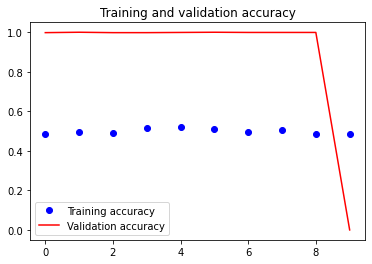

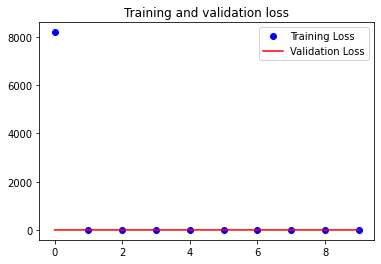

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()